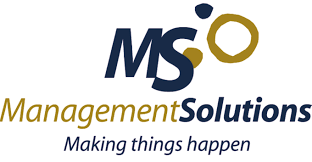

# **Ejercicios Curso Redes Neuronales MS**

In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

In [ ]:
make_circles?

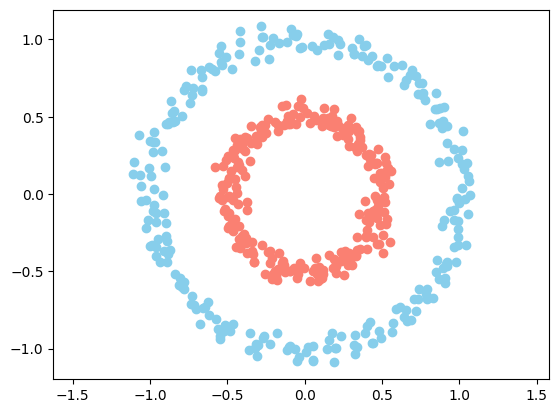

In [19]:
# Crear el dataset

n = 500 #500 personas
p = 2 #2 caracteristicas/parametros

X, Y = make_circles(n_samples=n, factor=0.5, noise = 0.05) #se aniade el parametro de noise para acercar el problema lo mas posible a un problema real

Y = Y[:, np.newaxis]

plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")
plt.axis("equal")
plt.show()

In [ ]:
print(X) #Es nuestro dataset de parametro de entrada, los puntos

[[ 1.74181056e-01  3.94956362e-01]
 [ 2.92742550e-01 -3.69810147e-01]
 [-3.31355308e-01  1.05649464e+00]
 [-2.29426952e-01  3.42461006e-01]
 [ 5.01471541e-01  9.54596025e-01]
 [-1.81623112e-01  5.24917603e-01]
 [-3.66463101e-01  9.79093007e-01]
 [ 7.35765278e-01 -6.14328909e-01]
 [-9.37259983e-01  4.27481523e-01]
 [-1.05521229e+00 -1.70474734e-01]
 [ 6.11203351e-01  7.47629344e-01]
 [-2.04352363e-01 -3.84242159e-01]
 [ 4.68185241e-01 -2.73629702e-01]
 [-2.78650001e-01 -5.47385185e-01]
 [ 1.62381081e-02 -4.76366774e-01]
 [-1.84582511e-01 -3.92199720e-01]
 [-5.05728887e-01 -7.38845566e-02]
 [ 8.58094176e-01  4.57474365e-01]
 [-2.72882470e-01  1.12562317e+00]
 [ 5.57460291e-01  1.90816047e-02]
 [-5.63389970e-01  2.60279272e-01]
 [-2.12269358e-01  4.46605555e-01]
 [ 3.08435661e-01  1.04866461e+00]
 [-4.07699453e-02 -6.39497166e-01]
 [-1.17356748e-01 -4.72659944e-01]
 [-3.84544279e-01  3.66690567e-01]
 [-4.04811872e-01 -1.76314690e-01]
 [ 4.44154257e-01 -1.07110776e-01]
 [-2.83818711e-02 -4

In [ ]:
print(Y) #es un vector binario que corresponde a la clasificacion de clases

[[1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]


Dentro de una capa, se esta realizando todas las operaciones para cada neurona. cada capa es un modulo, y cada modulo hace las mismas operaciones.
El modulo principal es una capa.
Vamos a definir una clase que se refiera a una capa. Esta se llamara neural_layer.

In [ ]:
#Sera solo la estructura de datos por ahora de la capa de red.
class neural_layer():
  def __init__(self, n_conn, n_neur, act_f):
  # Vamos a especificar cuantas conexiones hay de entrada, y cuantas neuronas tiene.
  # adicional, especificamos la funcion de activacion de esta capa.
    self.act_f = act_f #definiremos que la funcion de activacion sera el parametro que pasamos arriba
    self.b = np.random.rand(1, n_neur)       * 2 - 1    #aqui inicializamos al parametro de bayas que tendra tantas neuronas tiene nuestra capa de manera aleatoria, adicional queremos que nuestro valor de salida sea de -1 a 1. Vector
    self.W = np.random.rand(n_conn, n_neur)  * 2 - 1    #aqui inicializamos al parametro de bayas que tendra tantas neuronas tiene nuestra capa de manera aleatoria, adicional queremos que nuestro valor de salida sea de -1 a 1. Matriz




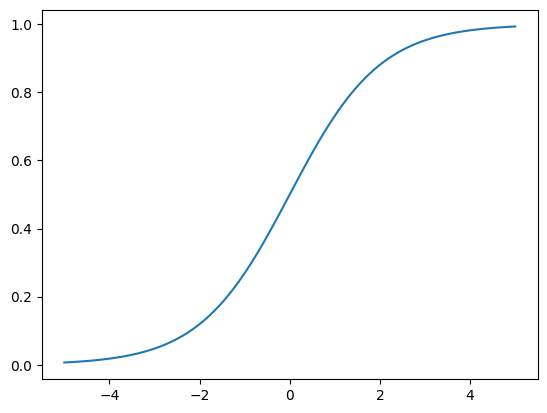

In [ ]:
# Crearemos las funciones de activacion.
# La suma en la que se pasara la suma no ponderada que podra combinar las neuronas.

sigm = lambda x: 1 / (1 + np.e ** (-x)) #para un parametro de entrada x, escribimos la formula de la funcion de activacion

_x = np.linspace(-5, 5, 100) # Creamos una variable que tenga 100 valores en el rango de 5 a -5
plt.plot(_x, sigm(_x))

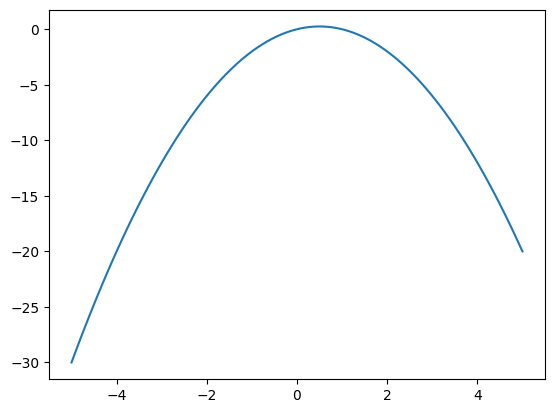

In [ ]:
# Dentro del algoritmo implementaremos backpropagation, que es la derivada de la funcion de activacion.
sigm = (lambda x: 1 / (1 + np.e ** (-x)), # Funcion Sigmoide, que podemos acceder con el indice 0
        lambda x: x * (1 - x))            # Funcion derivada (Backpropagation), que podemos acceder con el indice 1

_x = np.linspace(-5, 5, 100)
plt.plot(_x, sigm[1](_x))

In [14]:
# Si definimos nuestras capas de manera manual, nuestro codigo puede definirse de la siguiente forma, asignando los valores de manera manual
#l0 = neural_layer(p, 4, sigm)
#l1 = neural_layer(4, 8, sigm)
# ....

# Pero definiremos nuestra red neuronal de manera iterativa.

def create_nn(topology, act_f):

  nn = [] # definimos el vector donde contengamos a toda nuestra red neuronal.

  for l, layer in enumerate(topology[:-1]): # Vamos a recorrer el vector topology

    nn.append(neural_layer(topology[l], topology[l + 1], act_f)) # creamos nuestras capas

  return nn

topology = [p, 4, 8, 16, 8, 4, 1] # Definimos el # de neuronas que tendra nuestra capa. C1, C2, C3 etc. La ultima neurona es 1 por que....

create_nn(topology, sigm)

# Ya tenemos creada toda la estructura creada.

In [ ]:
# Definiremos todo el codigo que hara el entrenamiento de la red neuronal. Haremos un paso hacia adelante, un dato de entrada, un dato de salida, y asi la red neuronal ejecutara sus funciones de activacion hasta llegar al final y dar un valor. Lo que buscamos es que estos resultados se parezcan a tu vector de resultado.
# Como segundo paso hacemos las comparaciones de los resultados de la red neuronal, y lo comparamos con nuestro vector Y  de entrenamiento, y haremos la funcion de coste, la cual nos idce como se diferencian los resultados.
 # Lo que el paso 2 nos da, es una funcion de error, y eso nos permitira aplicar back propagation con las funciones de descenso del gradiente y asi obtendremos la optimizacion de esa funcion del coste.

In [15]:
topology = [p, 4, 8, 1]

neural_net = create_nn(topology, sigm)

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2), # Error cuadratico medio
           lambda Yp, Yr: (Yp - Yr))

def train(neural_net, X, Y, l2_cost, lr=0.05, train=True):

  out = [(None, X)] #vamos a guardar los pares de la suma ponderada y el valor de activacion que resulta de cada interaccion de capa a capa

  # Forward pass, tomamos el vector de entrada, y lo pasamos capa por capa.
  for l, layer in enumerate(neural_net): # Hacemos nuestro
    z = out[-1][1] @ neural_net[l].W + neural_net[l].b # La suma ponderada es igual a el vector de entrada multiplicado matricialmente por
                                                         # lo que tenemos en la capa 1 con parametro de pesos. y sumamos el parametro b
    a = neural_net[l].act_f[0](z) # La activacion es igual a la capa 0 con funcion de activacion, y le pasamos la suma ponderada. a es la salida de la capa 1.

    out.append((z, a))

  print(l2_cost[0](out[-1][1], Y)) # Aqui imprimimos nuestro valor de error

# Vamos a calcular back propagation:
  if train:
    # Implementaremos el backpropagation para el gradient descent respecto al coste. con esto propagamos el error hacia atras. Usaremos la funcion que calcula las derivadas de la capa usando el error de la capa anterior.

    # Backward pass
    deltas = [] # Almacenaremos nuestras deltas

    for l in reversed(range(0, len(neural_net))):

      z = out[l+1][0]
      a = out[l+1][1] # Estas son las salidas por cada capa , si aplicamos un print(a.shape) veremos (500, 1)

      print(a.shape)

      if l == len(neural_net) - 1:
        # Caso en que estemos en la ultima capa
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a)) # Computo del error de la ultima capa

      else:
        print(deltas[0].shape, _W.shape)
        # Caso en el que estemos en el resto de capas
        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a)) # Computo del error de la ultima capa

      _W = neural_net[l].W

      # Gradient descent
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims = True) * lr # Costo en funcion del parametro de bayes
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr # Costo en funcion del parametro de bayes
  return out[-1][1]

train(neural_net, X, Y, l2_cost, 0.5)

0.43232317018359445
(500, 1)
(500, 8)
(500, 1) (8, 1)
(500, 4)
(500, 8) (4, 8)


array([[0.9267485 ],
       [0.92559979],
       [0.92881753],
       [0.92767425],
       [0.92686448],
       [0.92776367],
       [0.92879795],
       [0.92431822],
       [0.92971631],
       [0.92958573],
       [0.92633534],
       [0.9268944 ],
       [0.925284  ],
       [0.92696829],
       [0.92620932],
       [0.9268324 ],
       [0.92801842],
       [0.92544754],
       [0.9287751 ],
       [0.92542788],
       [0.92848995],
       [0.92774842],
       [0.92738886],
       [0.92622238],
       [0.92657623],
       [0.92810882],
       [0.92764045],
       [0.9255258 ],
       [0.92633211],
       [0.92643198],
       [0.92922027],
       [0.92698267],
       [0.92458635],
       [0.92641719],
       [0.92921512],
       [0.92907409],
       [0.92541153],
       [0.92570259],
       [0.92700192],
       [0.92657934],
       [0.92507247],
       [0.92683812],
       [0.92521564],
       [0.92792127],
       [0.92791927],
       [0.92616943],
       [0.92732563],
       [0.927

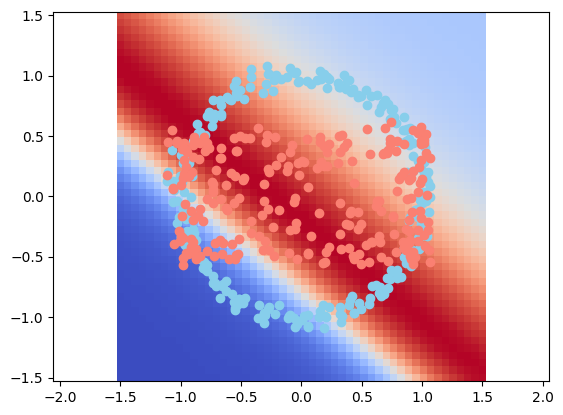

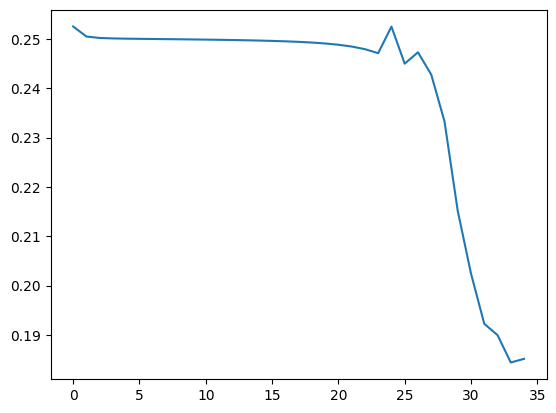

0.1821946003381422
(500, 1)
(500, 8)
(500, 1) (8, 1)
(500, 4)
(500, 8) (4, 8)
0.1850258034395826
(500, 1)
(500, 8)
(500, 1) (8, 1)
(500, 4)
(500, 8) (4, 8)
0.18205025454171175
(500, 1)
(500, 8)
(500, 1) (8, 1)
(500, 4)
(500, 8) (4, 8)
0.18489524684303418
(500, 1)
(500, 8)
(500, 1) (8, 1)
(500, 4)
(500, 8) (4, 8)
0.18190904718305706
(500, 1)
(500, 8)
(500, 1) (8, 1)
(500, 4)
(500, 8) (4, 8)
0.18476752947846195
(500, 1)
(500, 8)
(500, 1) (8, 1)
(500, 4)
(500, 8) (4, 8)
0.1817708595280202
(500, 1)
(500, 8)
(500, 1) (8, 1)
(500, 4)
(500, 8) (4, 8)
0.1846425406570451
(500, 1)
(500, 8)
(500, 1) (8, 1)
(500, 4)
(500, 8) (4, 8)


KeyboardInterrupt: ignored

In [20]:
from IPython.core.display import clear_output
# Nos toca iterar sobre la funcion de entrenamiento para observar como va mejorando el resultado.
import time

neural_n = create_nn(topology, sigm)

loss = []

for i in range (2500):
  # Entrenamos a la red
  pY = train(neural_n, X, Y, l2_cost, lr = 0.05)

  if i % 25 == 0:

    print(pY)

    loss.append(l2_cost[0](pY, Y))

    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:, 0] == 0, 1], c ="skyblue")
    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:, 0] == 1, 1], c ="salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)

# Convolutional Neural Network (CNN)

##### Copyright 2019 The TensorFlow Authors.

This tutorial demonstrates training a simple [Convolutional Neural Network](https://developers.google.com/machine-learning/glossary/#convolutional_neural_network) (CNN) to classify [CIFAR images](https://www.cs.toronto.edu/~kriz/cifar.html). Because this tutorial uses the [Keras Sequential API](https://www.tensorflow.org/guide/keras/overview), creating and training your model will take just a few lines of code.


### Import TensorFlow

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:


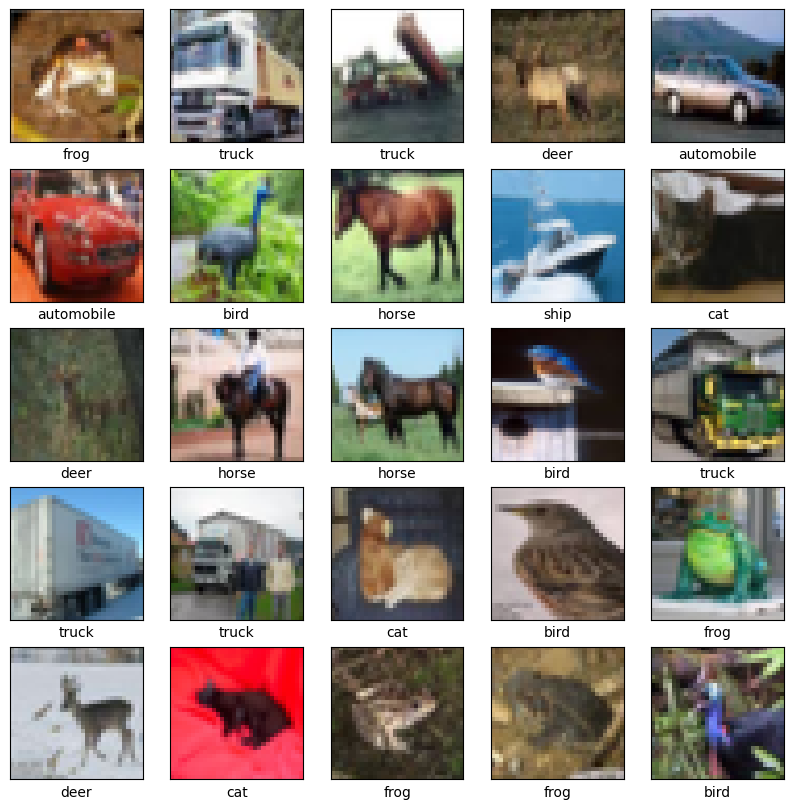

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Create the convolutional base

The 6 lines of code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument `input_shape` to your first layer.


In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Let's display the architecture of your model so far:

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically,  as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

### Add Dense layers on top

To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

Here's the complete architecture of your model:

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

The network summary shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

### Compile and train the model

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 20s 6ms/step - loss: 1.5100 - accuracy: 0.4491 - val_loss: 1.2416 - val_accuracy: 0.5616
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1518 - accuracy: 0.5919 - val_loss: 1.1487 - val_accuracy: 0.5971
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0054 - accuracy: 0.6448 - val_loss: 1.0519 - val_accuracy: 0.6337
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9054 - accuracy: 0.6826 - val_loss: 0.9063 - val_accuracy: 0.6792
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8281 - accuracy: 0.7107 - val_loss: 0.9114 - val_accuracy: 0.6859
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7716 - accuracy: 0.7300 - val_loss: 0.8608 - val_accuracy: 0.7023
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7261 - accuracy: 0.7440 - val_loss: 0.8402 - val_accura

### Evaluate the model

313/313 - 1s - loss: 0.8497 - accuracy: 0.7189 - 895ms/epoch - 3ms/step


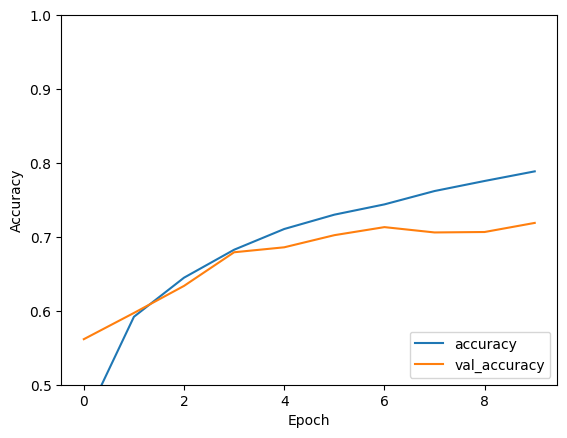

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [10]:
print(test_acc)

0.7189000248908997


Your simple CNN has achieved a test accuracy of over 70%. Not bad for a few lines of code! For another CNN style, check out the [TensorFlow 2 quickstart for experts](https://www.tensorflow.org/tutorials/quickstart/advanced) example that uses the Keras subclassing API and `tf.GradientTape`.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.